#### Задание 3. 
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
boston = load_boston()
boston_data = boston['data']
boston_target = boston['target']
X = pd.DataFrame(boston_data, columns=boston['feature_names'])
y = pd.DataFrame(boston_target, columns=['price'])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [5]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [6]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_test = kmeans.fit_predict(X_train_scaled)
labels_test = kmeans.predict(X_test_scaled)

ValueError: 'c' argument has 102 elements, which is inconsistent with 'x' and 'y' with size 404.

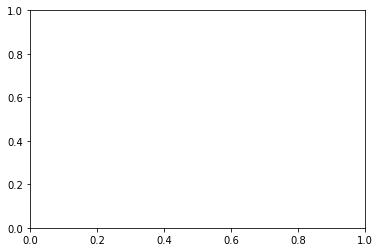

In [7]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=labels_test)
plt.show()

In [ ]:
print('Price')
print(f'Кластер 0: {y_test[labels_test == 0].mean()[0]}')
print(f'Кластер 1: {y_test[labels_test == 1].mean()[0]}')
print(f'Кластер 2: {y_test[labels_test == 2].mean()[0]}')

In [ ]:
print('CRIM')
print(f'Кластер 0: {X_test.loc[labels_test == 0, "CRIM"].mean()}')
print(f'Кластер 1: {X_test.loc[labels_test == 1, "CRIM"].mean()}')
print(f'Кластер 2: {X_test.loc[labels_test == 2, "CRIM"].mean()}')